In [2]:
import tkinter as tk
import os
from tkinter import filedialog
from tkinter import messagebox
from tkinter import PhotoImage
import time

key = 25

# Encrypt fonksiyonu
def encrypt():
    # Şifrelenecek görüntüyü seçmek için bir dosya iletişim kutusu açmak
    path = filedialog.askopenfilename()

    # istisnayı işlemek için engellemeyi deneyin
    try:

        # dosyayı okuma amacıyla aç
        fin = open(path, 'rb')

        # görüntü verilerini "image" değişkeninde depolamak
        image = fin.read()
        fin.close()

        # görüntüyü bayt dizisine dönüştürmek
        # sayısal veriler üzerinde kolayca şifreleme gerçekleştirin
        image = bytearray(image)

        # byteray'in her değerinde XOR işlemi gerçekleştirme
        for index, values in enumerate(image):
            image[index] = values ^ key

        # yazma amaçlı dosya açma
        fin = open(path, 'wb')

        # görüntüye şifreli veri yazma
        fin.write(image)
        fin.close()

        file_name = os.path.basename(path)
        directory = os.path.dirname(path)

        # dosya uzantısını değiştir
        new_path = os.path.join(directory, os.path.splitext(file_name)[0] + '.bin')
        os.rename(path, new_path)








        print('Encryption Done...')
        # Şifrelemenin tamamlandığını söyleyen bir iletişim kutusu göster
        messagebox.showinfo("Encryption Complete", "The image has been encrypted successfully!")
        # Ana ekrana dön

        show_main_screen()

    except Exception:
        print('Error caught : ', Exception.__name__)


# Decrypt function
def decrypt():
    path = filedialog.askopenfilename()

    messagebox.showinfo("Encryption Complete", "The image has been encrypted successfully!")
    # istisnayı işlemek
    try:
        # görüntünün yolunu girdi olarak al
        file_name = os.path.basename(path)
        directory = os.path.dirname(path)

        # dosya uzantısını değiştir
        new_path = os.path.join(directory, os.path.splitext(file_name)[0] + '.jpg')
        os.rename(path, new_path)
        # dosyayı okuma amacıyla aç
        fin = open(new_path, 'rb')

        # görüntü verilerini "image" değişkeninde depolamak
        image = fin.read()
        fin.close()

        # sayısal veriler üzerinde kolayca şifre çözme gerçekleştirmek için görüntüyü bayt dizisine dönüştürme
        image = bytearray(image)

        #byteray'in her değerinde XOR işlemi gerçekleştirme
        for index, values in enumerate(image):
            image[index] = values ^ key

        #yazma amaçlı dosya açma
        fin = open(new_path, 'wb')

        # şifre çözme verilerini görüntüye yazma
        fin.write(image)
        fin.close()
        print('Decryption Done...')


    except Exception:
        print('Error caught : ', Exception.__name__)

    # Decrypt function
    show_main_screen()


def show_main_screen():
    # ekranı temizle
    for widget in main_frame.winfo_children():
        widget.destroy()

    # "Şifrele" düğmesini göster
    encrypt_button = tk.Button(main_frame, text="Encrypt", command=encrypt)
    encrypt_button.pack()

    # "Şifreyi Çöz" düğmesini göster
    decrypt_button = tk.Button(main_frame, text="Decrypt", command=decrypt)
    decrypt_button.pack()


# Yükleme ekranını göster
def show_loading_screen():
    # ekranı temizle
    for widget in main_frame.winfo_children():
        widget.destroy()

    # "Şifrele" düğmesini göster
    encrypt_button = tk.Button(main_frame, text="Encrypt", command=encrypt)
    encrypt_button.pack()

    # "Şifreyi Çöz" düğmesini göster
    decrypt_button = tk.Button(main_frame, text="Decrypt", command=decrypt)
    decrypt_button.pack()

    


def show_loading_screen():
    # ekranı temizle
    for widget in main_frame.winfo_children():
        widget.destroy()

    # Görüntünün şifrelenmekte olduğunu belirten bir mesaj göster
    message = tk.Label(main_frame, text="Encrypting image...")
    message.pack()

    # Ana pencereyi oluştur


root = tk.Tk()
root.title("encrypto")
root.geometry("600x400")
root.minsize("600","400")
root.maxsize("1920","1080")
main_frame = tk.Frame(root)
main_frame.pack()

# Ana ekranı göster
show_main_screen()


root.mainloop()

Encryption Done...
Decryption Done...


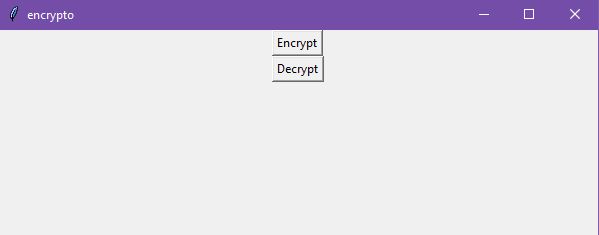 

Açılan ekrandan şifrelenecek resmi seçiyoruz.

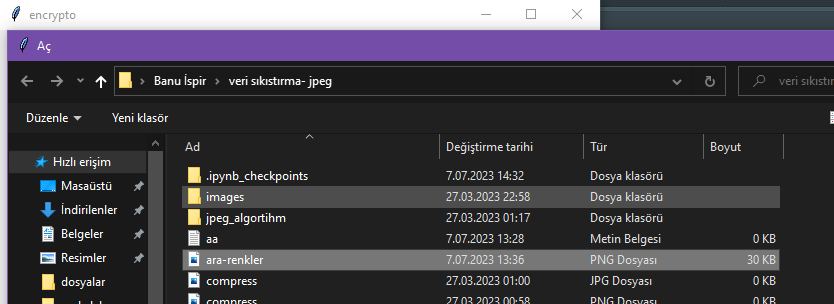

Ardından şifreleme gerçekleştirildiğinde mesaj ekranı çıkıyor.

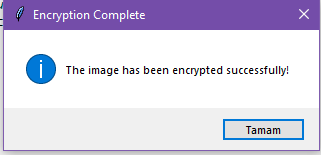

Aynı şey şifreyi çözmek için de tekrarlanınca resmin uzantısının değişimi görülüyor.

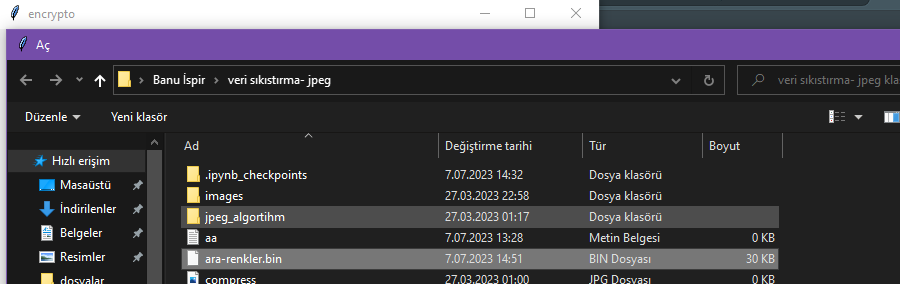


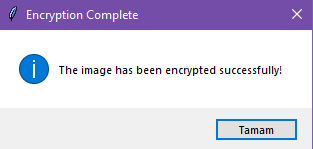